<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Préparation-des-données-mutations-et-de-leurs-positions." data-toc-modified-id="Préparation-des-données-mutations-et-de-leurs-positions.-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Préparation des données <code>mutations</code> et de leurs positions.</a></span></li><li><span><a href="#Filosofi" data-toc-modified-id="Filosofi-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Filosofi</a></span><ul class="toc-item"><li><span><a href="#Présentation-de-la-base-Filosofi" data-toc-modified-id="Présentation-de-la-base-Filosofi-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Présentation de la base Filosofi</a></span></li><li><span><a href="#Analyse-du-fichier-carroyée-de-200m" data-toc-modified-id="Analyse-du-fichier-carroyée-de-200m-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Analyse du fichier carroyée de 200m</a></span><ul class="toc-item"><li><span><a href="#Sauvegarde-du-fichier-restreint-à-Paris" data-toc-modified-id="Sauvegarde-du-fichier-restreint-à-Paris-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Sauvegarde du fichier restreint à Paris</a></span></li><li><span><a href="#Analyse-de-la-table" data-toc-modified-id="Analyse-de-la-table-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Analyse de la table</a></span><ul class="toc-item"><li><span><a href="#Quelques-définitions" data-toc-modified-id="Quelques-définitions-2.2.2.1"><span class="toc-item-num">2.2.2.1&nbsp;&nbsp;</span>Quelques définitions</a></span></li><li><span><a href="#Lecture" data-toc-modified-id="Lecture-2.2.2.2"><span class="toc-item-num">2.2.2.2&nbsp;&nbsp;</span>Lecture</a></span></li><li><span><a href="#Analyse-de-la-table-par-arrondissement" data-toc-modified-id="Analyse-de-la-table-par-arrondissement-2.2.2.3"><span class="toc-item-num">2.2.2.3&nbsp;&nbsp;</span>Analyse de la table par arrondissement</a></span></li></ul></li></ul></li><li><span><a href="#Récupération-du-revenu-local" data-toc-modified-id="Récupération-du-revenu-local-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Récupération du revenu local</a></span></li></ul></li></ul></div>

# Préparation des données `mutations` et de leurs positions.

In [124]:
import pandas as pd
import geopandas as gpd
import re
import sklearn
import matplotlib.pyplot as plt

In [7]:
dossier_donnees = "C:/Users/khale/OneDrive/Documents/Ensae/Python pour le data scientist/Projets/dvf_ensae_sbra/khaled/data/r11/"

In [8]:
mutation_geomlocmut = gpd.read_file(dossier_donnees + "r11_mutation_geomlocmut.shp")
mutation_geomlocmut = mutation_geomlocmut.rename(columns={"IDMUTATION" : "idmutation"})
mutation_geomlocmut_wgs = mutation_geomlocmut.to_crs({'init' :'epsg:4326'}) 

C:\Users\khale\anaconda3\envs\projet_2A\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [9]:
mutation_brute = pd.read_csv(dossier_donnees + "r11_mutation.csv")
mutation_brute.shape

(1218527, 61)

On se retreint également aux mutations ayant eu lieu dans le département de Paris.

In [10]:
code_mutation_paris = list(mutation_brute[mutation_brute["coddep"] == 75]["idmutation"])

mutation_geomlocmut_wgs_paris = mutation_geomlocmut_wgs[mutation_geomlocmut_wgs["idmutation"].isin(code_mutation_paris)]

# Filosofi

## Présentation de la base Filosofi

Depuis plusieurs années, l’Insee diffuse des indicateurs sur les revenus déclarés des ménages à tous les niveaux géographiques jusqu’à l’infracommunal (RFL) ainsi que des indicateurs de revenus disponibles au niveau départemental (RDL).

Le dispositif FiLoSoFi a été mis en œuvre afin de disposer d’indicateurs de niveau de vie, d’inégalité et de pauvreté à un niveau local infra-départemental. Il remplace les dispositifs Revenus Fiscaux Localisés (RFL) et Revenus Disponibles Localisés (RDL).

Les données sont disponibles à une échelle carroyée (carreau de 200m / 1km) [ici](https://www.insee.fr/fr/statistiques/4176290?sommaire=4176305).

## Analyse du fichier carroyée de 200m 

In [12]:
chemin_donnees_filo = r"C:\Users\khale\OneDrive\Documents\Ensae\Python pour le data scientist\Projets\dvf_ensae_sbra\khaled\data\filosofi\metropole\Filosofi2015_carreaux_200m_metropole.shp".replace("\\","/")

In [13]:
filosofi_france = gpd.read_file(chemin_donnees_filo)

In [14]:
filosofi_paris = filosofi_france[filosofi_france["Depcom"].str[:2] == "75"]

In [15]:
del filosofi_france

Transformation en WGS84. 

In [16]:
filosofi_paris["geometry"] = filosofi_paris["geometry"].to_crs({'init' :'epsg:4326'})

C:\Users\khale\anaconda3\envs\projet_2A\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
C:\Users\khale\anaconda3\envs\projet_2A\lib\site-packages\geopandas\geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [22]:
filosofi_paris.head()

,IdINSPIRE,Id_carr1km,I_est_cr,Id_carr_n,Groupe,Depcom,I_pauv,Id_car2010,Ind,Men,...,Ind_11_17,Ind_18_24,Ind_25_39,Ind_40_54,Ind_55_64,Ind_65_79,Ind_80p,Ind_inc,I_est_1km,geometry
0,CRS3035RES200mN2893400E3763200,CRS3035RES1000mN2893000E3763000,0,CRS3035RES1000mN2893000E3763000,866132,75119,0,CRS3035RES200mN2893400E3763200,2818.5,990.0,...,308.0,208.0,517.0,524.0,362.0,351.0,93.0,69.0,0,"POLYGON ((2.37974 48.89386, 2.37946 48.89565, ..."
1,CRS3035RES200mN2890000E3762200,CRS3035RES1000mN2890000E3762000,0,CRS3035RES200mN2890000E3762200,862504,75111,0,CRS3035RES200mN2890000E3762200,1543.5,926.0,...,57.0,57.5,577.5,305.0,162.0,155.0,64.0,23.0,0,"POLYGON ((2.37086 48.86254, 2.37058 48.86432, ..."
2,CRS3035RES200mN2893400E3762400,CRS3035RES1000mN2893000E3762000,0,CRS3035RES1000mN2893000E3762000,866107,75119,0,CRS3035RES200mN2893400E3762400,1338.0,508.0,...,126.5,83.5,244.0,276.0,185.0,173.0,47.0,25.0,0,"POLYGON ((2.36888 48.89312, 2.36860 48.89490, ..."
3,CRS3035RES200mN2891800E3763600,CRS3035RES1000mN2891000E3763000,0,CRS3035RES200mN2891800E3763600,862421,75119,0,CRS3035RES200mN2891800E3763600,1235.5,633.0,...,87.5,39.0,345.0,270.0,124.0,126.0,68.0,35.0,0,"POLYGON ((2.38737 48.87993, 2.38710 48.88172, ..."
4,CRS3035RES200mN2890800E3763200,CRS3035RES1000mN2890000E3763000,0,CRS3035RES200mN2890800E3763200,862464,75120,0,CRS3035RES200mN2890800E3763200,685.0,349.0,...,48.5,24.5,152.0,141.0,69.0,124.0,38.0,13.0,0,"POLYGON ((2.38332 48.87062, 2.38305 48.87240, ..."


### Sauvegarde du fichier restreint à Paris

Le fichier est ici enregistré afin de réduire le temps d'ouverture de la table pour les prochaines analyses.

In [24]:
saving_path_paris = r"C:\Users\khale\OneDrive\Documents\Ensae\Python pour le data scientist\Projets\dvf_ensae_sbra\khaled\data\filosofi\metropole\filosofi_75.shp".replace("\\","/")

filosofi_paris.to_file(saving_path_paris)

### Analyse de la table

#### Quelques définitions

#### Lecture

In [81]:
filosofi_paris = gpd.read_file(r"C:\Users\khale\OneDrive\Documents\Ensae\Python pour le data scientist\Projets\dvf_ensae_sbra\khaled\data\filosofi\metropole\filosofi_75.shp".replace("\\","/"))

In [82]:
filosofi_paris2 = filosofi_paris.copy()

Cette table est constituée des 37 variables suivantes : 

|  IdINSPIRE |                                                                             Identifiant Inspire du carreau de 200 m                                                                             |
|:----------:|:-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------:|
| Id_carr1km |                                                           Identifiant Inspire du carreau de 1 km auquel appartient le carreau de 200 m                                                          |
|  I_est_cr  |                                                           Vaut 1 si le carreau de 200 m est imputé par une valeur approchée, 0 sinon.                                                           |
|  Id_carr_n |                                                      Identifiant Inspire du carreau de niveau naturel auquel appartient le carreau de 200 m                                                     |
|   Groupe   |                                                               Numéro du groupe auquel appartient le carreau (voir documentation).                                                               |
|   Depcom   |                                        Code commune, selon le code officiel géographique 2019, auquel sont rattachés la majorité des ménages du carreau.                                        |
|   I_pauv   |                            Nombre de carreaux de 200 m compris dans le carreau qui ont été traités pour respecter la confidentialité sur le nombre de ménages pauvres                           |
| Id_car2010 | Identifiant Inspire du carreau de 200 m figurant dans la base de données carroyées à 200 m diffusée avec la source RFL2010 (le nombre de caractères peut être différent de celui de IdINSPIRE). |
|     Ind    |                                                                                        Nombre d’individus                                                                                       |
|     Men    |                                                                                        Nombre de ménages                                                                                        |
|  Men_pauv  |                                                                                    Nombre de ménages pauvres                                                                                    |
|  Men_1ind  |                                                                               Nombre de ménages d’un seul individu                                                                              |
|  Men_5ind  |                                                                             Nombre de ménages de 5 individus ou plus                                                                            |
|  Men_prop  |                                                                                 Nombre de ménages propriétaires                                                                                 |
|   Men_fmp  |                                                                                 Nombre de ménages monoparentaux                                                                                 |
|   Ind_snv  |                                                                        Somme des niveaux de vie winsorisés des individus                                                                        |
|  Men_surf  |                                                                           Somme de la surface des logements du carreau                                                                          |
|  Men_coll  |                                                                            Nombre de ménages en logements collectifs                                                                            |
|  Men_mais  |                                                                                   Nombre de ménages en maison                                                                                   |
|  Log_av45  |                                                                            Nombre de logements construits avant 1945                                                                            |
|  Log_45_70 |                                                                        Nombre de logements construits entre 1945 et 1969                                                                        |
|  Log_70_90 |                                                                        Nombre de logements construits entre 1970 et 1989                                                                        |
|  Log_ap90  |                                                                            Nombre de logements construits depuis 1990                                                                           |
|   Log_inc  |                                                                  Nombre de logements dont la date de construction est inconnue                                                                  |
|   Log_soc  |                                                                                   Nombre de logements sociaux                                                                                   |
|   Ind_0_3  |                                                                                 Nombre d’individus de 0 à 3 ans                                                                                 |
|   Ind_4_5  |                                                                                 Nombre d’individus de 4 à 5 ans                                                                                 |
|  Ind_6_10  |                                                                                 Nombre d’individus de 6 à 10 ans                                                                                |
|  Ind_11_17 |                                                                                Nombre d’individus de 11 à 17 ans                                                                                |
|  Ind_18_24 |                                                                                Nombre d’individus de 18 à 24 ans                                                                                |
|  Ind_25_39 |                                                                                Nombre d’individus de 25 à 39 ans                                                                                |
|  Ind_40_54 |                                                                                Nombre d’individus de 40 à 54 ans                                                                                |
|  Ind_55_64 |                                                                                Nombre d’individus de 55 à 64 ans                                                                                |
|  Ind_65_79 |                                                                                Nombre d’individus de 65 à 79 ans                                                                                |
|   Ind_80p  |                                                                               Nombre d’individus de 80 ans ou plus                                                                              |
|   Ind_inc  |                                                                            Nombre d’individus dont l’âge est inconnu                                                                            |
|  I_est_1km |                                        Vaut 1 si le carreau de 1 km auquel est rattaché le carreau de 200 m est imputé par une valeur approchée, 0 sinon.                                       |

 #### Analyse de la table par arrondissement

#####  Construction de la table

L'analyse va être réalisé à une échelle agrégée pour la prise en main de la table. Nous allons considérer l'arrondissement comme individu statistique. Certaines variables doivent être donc recalculées : par exemple, la part de 65 à 79 ans plutôt que le nombre. À la partie suivante, on propose une fonction permettant de renvoyer la table avec les "nouvelles" variables (proportion, écart type, surface moyenne etc...) à partir d'un zonage quelconque (défini à l'aide d'une variable).

In [83]:
filosofi_paris["arrond"] = filosofi_paris["Depcom"].str[3:]

In [84]:
ind_par_arrond = filosofi_paris.filter(regex = "(?i)(.*(arrond|men|log|ind).*)").groupby("arrond").sum() 
#(?!) devant un regex permet d'être insensible à la casse

Mise en pourcentage pour éviter les effets tailles

In [85]:

ind_par_arrond.loc[:,"Ind_0_3":"Ind_inc"] = ind_par_arrond.loc[:,"Ind_0_3":"Ind_inc"].apply(lambda x : 100*x /ind_par_arrond["Ind"])

nb_log = ind_par_arrond.loc[:, "Log_av45":"Log_inc"].apply(sum, axis = 1)
ind_par_arrond.loc[:, "Log_av45":"Log_inc"] = ind_par_arrond.loc[:, "Log_av45":"Log_inc"].apply(lambda x: 100*x/nb_log) #la lambda fonction est appliquée colonne par colonne

ind_par_arrond["Log_soc"] = 100*ind_par_arrond["Log_soc"]/nb_log

ind_par_arrond.loc[:, "Men_pauv":"Men_fmp"] = ind_par_arrond.loc[:, "Men_pauv":"Men_fmp"].apply(lambda x : 100*x / ind_par_arrond["Men"])

Les ménages sont répartis entre logement collectif et en maison. Attention : si cela ne somme pas à 100%, c'est qu'il y a les caravanes qui ont été exclues. Cette information est issue de la taxe d'habitation.

In [96]:
ind_par_arrond.loc[:, "Men_coll":"Men_mais"] = ind_par_arrond.loc[:, "Men_coll":"Men_mais"].apply(lambda x : 100*x / ind_par_arrond["Men"])

Dans la table *ind_par_arrond*, nous disposons de : 
- la somme des niveaux de vie winsorisés (application d'une fonction du type $\min(revenu,seuil)$) des individus
- la somme de la surface des logements du carreau

Nous allons ajouter : 
- le niveau de vie winsorisé par habitant *nv_par_hab*
- la surface moyenne des logements par arrondissement *sur_moyen*


In [101]:
#ind_par_arrond[["nv_par_hab"]]
ind_par_arrond["nv_par_hab"] = ind_par_arrond["Ind_snv"]/ind_par_arrond["Ind"]
ind_par_arrond["ind_par_arrond"] = ind_par_arrond["Men_surf"]/nb_log

##### Analyse factorielle de la table par arrondissement

Choix des variables pour l'analyse 

In [104]:
ind_par_arrond.columns

Index(['Ind', 'Men', 'Men_pauv', 'Men_1ind', 'Men_5ind', 'Men_prop', 'Men_fmp',
       'Ind_snv', 'Men_surf', 'Men_coll', 'Men_mais', 'Log_av45', 'Log_45_70',
       'Log_70_90', 'Log_ap90', 'Log_inc', 'Log_soc', 'Ind_0_3', 'Ind_4_5',
       'Ind_6_10', 'Ind_11_17', 'Ind_18_24', 'Ind_25_39', 'Ind_40_54',
       'Ind_55_64', 'Ind_65_79', 'Ind_80p', 'Ind_inc', 'nv_par_hab',
       'ind_par_arrond'],
      dtype='object')

In [106]:
ind_par_arrond

,Ind,Men,Men_pauv,Men_1ind,Men_5ind,Men_prop,Men_fmp,Ind_snv,Men_surf,Men_coll,...,Ind_11_17,Ind_18_24,Ind_25_39,Ind_40_54,Ind_55_64,Ind_65_79,Ind_80p,Ind_inc,nv_par_hab,ind_par_arrond
arrond,,,,,,,,,,,,,,,,,,,,,
01,15272.0,8361.2,13.232550,52.625221,3.565278,31.194087,8.972396,5.869567e+08,493935.0,97.977563,...,5.906888,4.401519,25.561812,22.935437,11.289288,12.923651,5.150602,2.731797,38433.516599,59.074654
02,21137.0,11659.0,15.001287,54.567287,3.550905,34.059525,7.273351,7.394809e+08,585414.0,98.739171,...,5.249089,4.269764,32.788475,23.570043,9.996688,9.173487,2.739272,2.072196,34985.140999,50.211339
03,36011.0,19747.0,13.997063,54.079101,3.782853,37.869043,7.773333,1.303419e+09,1072752.0,98.749177,...,5.569132,4.068201,29.413235,22.744439,11.102163,11.313210,3.773847,2.357613,36195.029161,54.324809
04,25454.0,13819.2,13.558672,52.267859,3.581249,34.371020,8.710345,9.240984e+08,790943.0,97.981793,...,5.802231,4.064980,25.359865,21.626856,12.141510,13.548755,5.309578,2.717451,36304.643651,57.235079
05,49386.0,26144.8,13.180441,51.699382,4.310609,36.979438,8.384076,1.862882e+09,1476419.8,98.148771,...,6.558741,4.719961,23.179444,19.358320,11.791803,15.216863,6.254809,3.395699,37720.856907,56.470878
06,35762.5,19105.0,12.494111,51.886941,4.344412,41.973305,7.757132,1.559496e+09,1318186.0,96.461659,...,6.239776,4.457183,20.440405,19.162531,12.264243,17.241524,7.902132,3.587557,43607.030840,68.996912
07,48239.5,24534.1,11.207258,49.201723,5.594255,41.219772,7.194884,2.232585e+09,1872908.3,94.713480,...,7.063091,4.668166,20.409623,19.572342,11.875952,15.577690,7.535319,3.761026,46281.254474,76.338985
08,37865.0,17503.0,12.790379,43.281723,7.362738,37.789522,8.444267,1.686523e+09,1399120.7,93.253157,...,7.909151,4.914301,21.354021,21.596461,11.937937,11.488446,4.834544,4.217351,44540.428742,79.936051
09,55118.0,27925.0,12.848344,49.192480,4.920322,41.407341,8.064458,2.064245e+09,1667331.9,96.995524,...,6.629413,4.317101,28.843572,21.386843,10.301535,9.958634,3.882761,2.908306,37451.381393,59.707499


On centre et réduit les données en amont en utilisant la classe `StandardScaler`.

In [137]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

ind_par_arrond_c_r = sc.fit_transform(ind_par_arrond)

Première analyse pour obtenir le *barplot* des inerties et ainsi déterminer le nombre d'axes à conserver.

In [131]:
from sklearn.decomposition import PCA

acp = PCA(svd_solver= "full")

coord = acp.fit_transform(ind_par_arrond_c_r)

eigval = (len(ind_par_arrond_c_r) - 1)/(len(ind_par_arrond_c_r))*acp.explained_variance_ratio_ 

<BarContainer object of 20 artists>

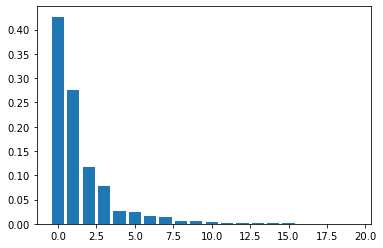

In [130]:
#Pour faire des plots avec des arrays --> matplotlib

plt.bar(range(len(acp.explained_variance_ratio_)), acp.explained_variance_ratio_)

On conservera ici soit deux axes soit quatre axes à l'aide de la méthode du coude ou du critère de Kaiser.

##### Calcul des aides à l'interprétation

In [136]:
ctr = coord**2

#Contribution des individus
for j in range(4):
 ctr[:,j] = ctr[:,j]/(len(ind_par_arrond_c_r)*eigval[j])

#Qualité de représentation des individus
di = np.sum(ind_par_arrond_c_r**2, axis = 1)

print(di)

[24.00124533 43.28882099 35.64238326 19.51393486 14.30000493 40.64704011
 35.71791273 42.58089269 15.59502828 15.40200972 15.31690283 13.23097182
 37.61639541 11.18496612 25.14736382 58.26008806 11.97978211 23.79776905
 77.77167663 39.00481123]


## Récupération du revenu local

In [20]:
def is_point_in_poly(point, poly):
    return point.intersects(poly)

In [21]:
#get the number of the poly of the point
#Return None if the point isn't in any polygon.
def get_number_poly(point, polys):
    polys = list(polys)
    try: 
        res = list(map(lambda x : is_point_in_poly(point,x) , polys)).index(True)
    except ValueError:
        res = None
    return res

Test de la fonction sur 100 points afin d'avoir une idée du timing : 

In [113]:
test_100_pts = mutation_geomlocmut_wgs_nord["geometry"].head(100)

In [137]:
res2 = list(map(lambda x : get_number_poly(x, filosofi_nord["geometry"]), test_100_pts))

In [129]:
GeoDataFrame({"points" : test_100_pts,
             "num_poly" : }

34811    POINT (3.04456 50.57734)
34812    POINT (2.90945 50.50903)
34813    POINT (3.96977 50.27345)
34814    POINT (3.07244 50.66921)
34815    POINT (3.96908 50.27449)
                   ...           
34906    POINT (3.01017 50.61772)
34907    POINT (3.04526 50.58991)
34908    POINT (3.05940 50.63121)
34909    POINT (2.96937 50.65149)
34910    POINT (3.05674 50.63487)
Name: geometry, Length: 100, dtype: geometry